In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd
colnames = ['start_time',
'end_time',
'trip_duration',
'start_station_id',
'start_station_name',
'end_station_id',
'end_station_name',
'usertype',
'gender',
'start_lat',
'start_lng',
'end_lat',
'end_lng',
'rideable_type',
'start_city',
'start_landmark',
'end_city',
'end_landmark',
'start_date',
'end_date',
'start_dpcapacity',
'end_dpcapacity',
'age',
'st_hour',
'st_minute',
'st_second',
'ed_hour',
'ed_minute',
'ed_second',
'st_year',
'st_month',
'st_day',
'ed_year',
'ed_month',
'ed_day']
d1 = pd.read_csv('1.csv',names=colnames)
d2 = pd.read_csv('2.csv',names=colnames)
d3 = pd.read_csv('3.csv',names=colnames)
d4 = pd.read_csv('4.csv',names=colnames)
d5 = pd.read_csv('5.csv',names=colnames)
d6 = pd.read_csv('6.csv',names=colnames)
d7 = pd.read_csv('7.csv',names=colnames)
d8 = pd.read_csv('8.csv',names=colnames)
d9 = pd.read_csv('9.csv',names=colnames)

In [3]:
divvy = pd.concat([d1,d2,d3,d4,d5,d6,d7,d8,d9])

In [4]:
new_col = ['start_time',
'trip_duration',
'start_station_name',
'end_station_name',
'usertype',
'gender',
'start_lat',
'start_lng',
'start_city',
'start_date',
'start_dpcapacity',
'end_dpcapacity',
'age',
'st_hour',
'st_year',
'st_month',]

In [5]:
divvy = divvy.loc[::100]

In [6]:
divvy = divvy.loc[:,new_col]

In [7]:
divvy.drop(["usertype","gender","age"], axis=1).describe() # continuous variables

,trip_duration,start_lat,start_lng,start_city,start_dpcapacity,end_dpcapacity,st_hour,st_year,st_month
count,51264.000000,51264.000000,51264.000000,51264.000000,51264.000000,51264.000000,51264.000000,51264.000000,51264.000000
mean,961.574575,41.901997,-87.644443,0.006886,21.342170,21.151217,14.184886,2021.773018,7.494187
std,1070.372407,0.042269,0.024443,0.088617,10.021105,9.907716,4.967066,0.418885,2.522258
min,1.000000,41.648501,-87.820000,0.000000,0.000000,0.000000,0.000000,2021.000000,1.000000
25%,367.000000,41.881320,-87.657030,0.000000,15.000000,15.000000,11.000000,2022.000000,6.000000
50%,641.000000,41.896847,-87.641697,0.000000,19.000000,19.000000,15.000000,2022.000000,8.000000
75%,1136.000000,41.928712,-87.628579,0.000000,25.000000,25.000000,18.000000,2022.000000,10.000000
max,10750.000000,42.064854,-87.528232,2.000000,55.000000,55.000000,23.000000,2022.000000,12.000000


In [8]:
divvy["age"].describe() # continuous but aaron's data

count    51264.0
mean        -1.0
std          0.0
min         -1.0
25%         -1.0
50%         -1.0
75%         -1.0
max         -1.0
Name: age, dtype: float64

In [9]:
divvy.loc[:,["usertype","gender"]].nunique() # arron's data

usertype    2
gender      1
dtype: int64

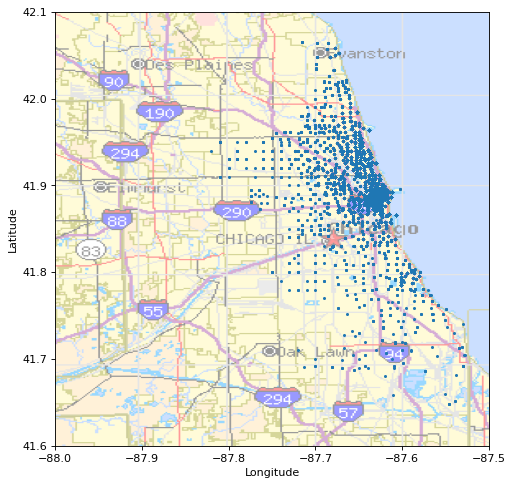

In [10]:
import matplotlib.pyplot as plt

def sensor_viz():
    img = plt.imread("chicago.jpg")
    fig,ax = plt.subplots(figsize=(10,100),dpi = 80)
    fig.set_size_inches(7,10)
    ax.imshow(img,extent=[-88.02,-87.34,41.58,42.1],alpha = 0.4)
    plt.scatter(x = divvy['start_lng'],y=divvy['start_lat'],s=3)
    plt.xlim(-88,-87.5)
    plt.ylim(41.6,42.1)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
sensor_viz()

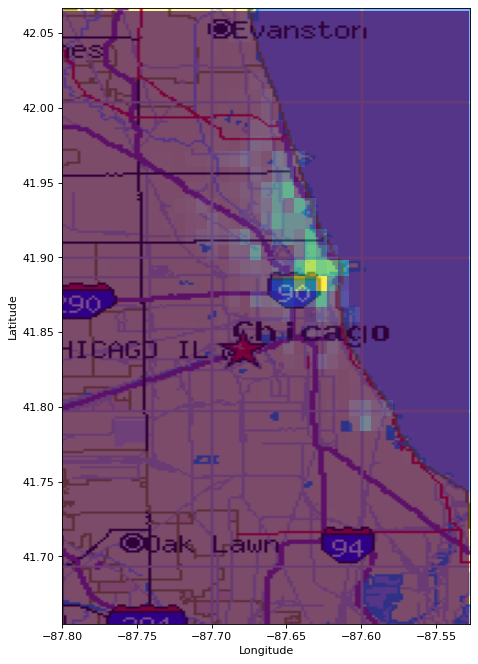

In [11]:
heatmap, xedges, yedges = np.histogram2d(divvy['start_lng'], divvy['start_lat'], bins=(40, 40))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
def sensor_viz():
    img = plt.imread("chicago.jpg")
    fig,ax = plt.subplots(figsize=(10,100),dpi = 80)
    fig.set_size_inches(7,10)
    ax.imshow(img,extent=[-88.02,-87.34,41.58,42.1])
    plt.xlim(-87.8,-87.527)
    plt.ylim(41.655,42.067)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis', alpha=0.7)
sensor_viz()

In [12]:
import numpy as np
step = 0.01
to_bin = lambda x: np.floor(x / step) * step
divvy["latlon"] = tuple(zip(to_bin(divvy.start_lat),to_bin(divvy.start_lng)))

In [13]:
data = divvy.groupby('latlon')['trip_duration'].mean()

In [21]:
data.values

array([1507.        , 2667.        , 1508.        , 3095.        ,
        205.5       , 2814.        , 2401.66666667,   29.        ,
       4520.        , 1885.        ,  828.66666667,  894.        ,
       1269.        , 1587.        , 1064.5       ,  153.        ,
       1173.5       , 1758.8       , 1955.        ,   56.        ,
       1306.        ,  716.        ,  415.        ,   27.        ,
       3743.5       , 1288.        ,  826.        , 1375.        ,
        399.        , 1087.83333333, 2937.5       ,   18.        ,
        518.        ,  691.        , 1489.        , 2427.        ,
        680.55555556, 2910.        , 1646.        ,  244.        ,
        304.        ,  677.42857143, 1139.        ,  615.16666667,
       1296.        ,  678.        , 1045.33333333, 1982.        ,
        735.        , 1262.        ,  305.        ,  752.5       ,
        292.        ,  736.        , 1996.5       ,  153.        ,
        867.16666667, 1437.4       ,  912.        , 2939.25   

In [25]:
import plotly.express as px

# Data with latitude/longitude and values
df = pd.read_csv('https://raw.githubusercontent.com/R-CoderDotCom/data/main/sample_datasets/population_galicia.csv')

fig = px.density_mapbox(lat = list(zip(*data.index))[0], lon = list(zip(*data.index))[1], z = data.values,
                        radius = 10,
                        center = dict(lat = 41.85, lon = -87.71),
                        zoom = 8.5,
                        mapbox_style = 'open-street-map',
                        range_color=[600, 1300])
fig.show()

In [24]:
step = 0.1
to_bin = lambda x: np.floor(x / step) * step
divvy["latlon"] = tuple(zip(to_bin(divvy.start_lat),to_bin(divvy.start_lng)))

In [ ]:
order = divvy['latlon'].value_counts().index
coord_dict = {order[i]:i for i in range(len(order))}
divvy['dense_ord'] = divvy['latlon'].apply(lambda x: coord_dict[x])

In [ ]:

img = plt.imread("chicago.jpg")
fig,ax = plt.subplots(figsize=(10,100),dpi = 80)
fig.set_size_inches(7,10)
ax.imshow(img,extent=[-88.02,-87.34,41.58,42.1])
for x in order:
    value = coord_dict[x] + 1
    text = f"{value}"
    ax.text(x[1] + 0.05, x[0] + 0.05, text, color='white', fontsize=15,bbox=dict(alpha = 0.7,facecolor='black', edgecolor='none', boxstyle='round,pad=0.3'))
plt.xlim(-88,-87.5)
plt.ylim(41.6,42.1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [ ]:
a = sns.FacetGrid(divvy, col = 'dense_ord',col_wrap=3, height=3.5,aspect = 1,sharex=False, sharey=False)
a.map(plt.hist, "trip_duration", bins=50, color='skyblue', edgecolor='black')
a.set_axis_labels("Ride duration", "Frequency")
a.add_legend()

In [ ]:
a = sns.FacetGrid(divvy, col = 'dense_ord',col_wrap=3, height=3.5,aspect = 1,sharex=False, sharey=False)
a.map(plt.hist, "start_date", bins=50, color='skyblue', edgecolor='black')
a.set_axis_labels("Sep 2021 - Oct 2022", "Frequency")
a.set_xticklabels([])
a.add_legend()

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x = 'dense_ord', y = 'start_dpcapacity', data = divvy)
ax.set_xticklabels(divvy['latlon'].value_counts())
ax.set_xlabel('Area density')
ax.set_ylabel('Station capacity')